# Lotka-Volterra Equations

From Wikipedia, the free encyclopedia

<https://en.wikipedia.org/wiki/Lotka-Volterra_equations>

The Lotka–Volterra equations, also known as the predator–prey equations, are a pair of first-order, non-linear, differential equations frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey. The populations change through time according to the pair of equations:

$$
\begin{align}
\frac{dx}{dt} & = \alpha x - \beta x y \\
\frac{dy}{dt} & = \delta x y  - \gamma y
\end{align}
$$

* $x$ is the number of prey (for example, rabbits);

* $y$ is the number of some predator (for example, foxes);

* $dy/dt$ and $dx/dt$ represent the growth rates of the two populations over time;

* $t$  represents time; and

* $\alpha$, $\beta$, $\gamma$, and $\delta$ are positive real parameters describing the interaction of the two species.

# Challenge

Use Euler's method to produce a numerical solution to the Lotka Voltera equations.  Plot with matplotlib.

# Euler's method

Let $x$ be a vector.  We can define a system of ODEs with an initial value as

$$
\begin{align}
\frac{dx}{dt} & = f(x,t) \\
x(0)          & = x_0.
\end{align}
$$

In Euler's method, we discretize over time and replace the derivate with a finite difference:

$$
\frac{dx}{dt} \approx \frac{x_{i+1}-x_i}{\Delta t}
$$

The algorithm is:

$$
x_{i+1} \gets x_i + \Delta t f(x_i,t_i).
$$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
# first define a function for the right hand size
def lotka_voltera(x,t,p):
    """lotka voltera rhs
    inputs:
      x = state variable vector
      t = time
      p = dictionary of model parameters
    output:
      y = derivative vector
    """
    y0 = p['alpha'] * x[0] - p['beta']*x[0]*x[1]
    y1 = p['delta'] * x[0] * x[1] - p['gamma']*x[1]
    return (y0, y1)

In [4]:
# write code for euler's method
def forward_euler(f,x0,t0,dt,nt,p):
    """forward euler's method
    inputs:
      f  = function to integrate
      x0 = initial value
      t0 = initial time
      dt = time step
      nt = desired number of steps
      p  = model parameters, passes to f as third argument
    """
    # get number of variables
    nvar = len(x0)
    # allocate output numpy array
    x = np.zeros((nvar,nt))
    # allocate time vector
    t = np.zeros(nt)
    # store initial values
    x[0,0] = x0[0]
    x[1,0] = x0[1]
    t[0] = t0
    # step through time
    for i in xrange(1,nt):
        # get derivative
        dx = f(x[:,i-1],t[i-1],p)
        # convert to np array
        dx = np.array(dx)
        x[:,i] = x[:,i-1] + dt * dx
        t[i] = t[i-1] + dt
    return x, t

In [20]:
# set up parameters
p = {}
p['alpha'] = 1.0
p['beta'] = 0.1
p['delta'] = 0.1
p['gamma'] = 1.0
# set up starting point
x0 = (10.0, 5.0)
t0 = 0.0
dt = 0.05
nt = 1000
# compute numerical solution
x, t = forward_euler(lotka_voltera,x0,t0,dt,nt,p)

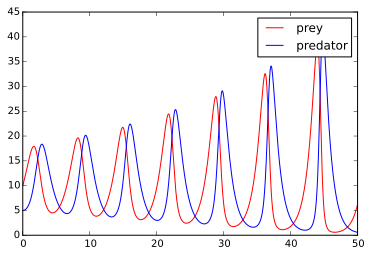

In [21]:
# plot
plt.plot(t,x[0,:],'r',label='prey')
plt.plot(t,x[1,:],'b',label='predator')
plt.legend()

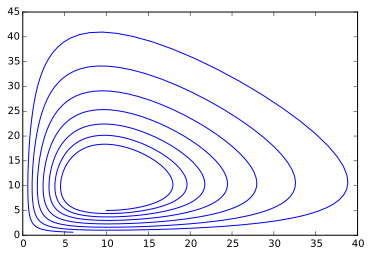

In [22]:
plt.plot(x[0,:],x[1,:])